In [1]:
import pandas as pd

import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import io
import os

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
from classes.cnn_geometric_model_yong import CNNGeometric
from classes.train_test import train
from classes.YongDataSet import Yong_DataSet
#from classes.coupled_dataset_yong import CoupledDataset
#from classes.transformation_yong import CoupledPairTnf
#from classes.loss import TransformedGridLosssd


In [3]:
num_epoch = 20
batch_size =15
lr = 0.001
use_cuda = torch.cuda.is_available()
torch.manual_seed(1)
if use_cuda:
    torch.cuda.manual_seed(1)
    print('seeded')
model = CNNGeometric(use_cuda =True, 
                         geometric_model='affine',
                        feature_extraction_cnn='vgg')

loss = nn.MSELoss()
#loss = TransformedGridLoss(use_cuda=use_cuda,
 #                                  geometric_model='affine')
training_img_path='DataSet/'
print('Initialize train paths')
train_csv = 'train_yong.csv'
"""
dataset = CoupledDataset(geometric_model='affine',
                               csv_file=train_csv,
                               training_image_path=training_img_path,
                               random_sample=False)
pair_generation_tnf = CoupledPairTnf(use_cuda=use_cuda)

"""
dataset = Yong_DataSet(geometric_model = 'affine', 
                        csv_file = train_csv,
                   training_image_path = training_img_path)

dataloader = DataLoader(dataset, batch_size= 15, shuffle=True,
                           num_workers=4)

optimizer = optim.Adam(model.FeatureRegression.parameters(), lr=lr)
    
print('start training')
for epoch in range(1,num_epoch+1):
    x=train(epoch, model, loss, optimizer,dataloader,None)
print('done')
    


seeded
Initialize train paths
start training


Epoch 1:   0%|          | 0/572 [00:00<?, ?it/s]

RuntimeError: Given groups=1, weight of size 128 240 7 7, expected input[15, 225, 15, 15] to have 240 channels, but got 225 channels instead

In [3]:
model.eval()
test_df = pd.read_csv('test_yong.csv')


source_img_path = test_df.iloc[0,0]
source_img = io.imread(os.path.join(training_img_path,source_img_path))


In [5]:
#affine = df.iloc[16,2:]
#affine= np.array([affine])
#affine = affine.astype('float').reshape(2,3)
#print(affine)
target_img_path = test_df.iloc[0,1]
target_img = io.imread(os.path.join(training_img_path,target_img_path))


In [6]:
affine = test_df.iloc[0,2:]
affine= np.array([affine])
affine = affine.astype('float').reshape(2,3)
print(affine)

[[-1.8369702e-16 -1.0000000e+00  3.2000000e+02]
 [ 1.0000000e+00 -1.8369702e-16  8.0000000e+01]]


In [7]:
testSet = Yong_DataSet(geometric_model = 'affine', 
                        csv_file = 'test_yong.csv',
                   training_image_path = training_img_path)

In [8]:
testloader = DataLoader(testSet,batch_size=1,shuffle=False)

In [10]:
for idx,batch in enumerate(testloader):
    print(model(batch))
    break

tensor([[-5.6845e-01, -6.0035e-02,  1.1484e+02,  5.6865e-02, -5.4653e-01,
          1.1383e+02]], device='cuda:0', grad_fn=<AddmmBackward>)


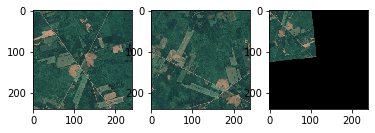

In [12]:
affine = [[-5.6845e-01, -6.0035e-02,  1.1484e+02,],  [5.6865e-02, -5.4653e-01,
          1.1383e+02]]
new_img = cv2.warpAffine(source_img, np.array(affine),(240, 240))

fig,(ax1, ax2, ax3) = plt.subplots(1,3)
ax1.imshow(source_img)
ax2.imshow(target_img)
ax3.imshow(new_img)
plt.show()


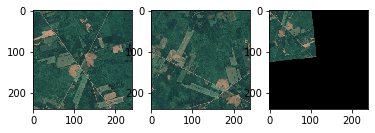

In [11]:
affine = [[-5.6845e-01, -6.0035e-02,  1.1484e+02,],  [5.6865e-02, -5.4653e-01,
          1.1383e+02]]
new_img = cv2.warpAffine(source_img, np.array(affine),(240, 240))

fig,(ax1, ax2, ax3) = plt.subplots(1,3)
ax1.imshow(source_img)
ax2.imshow(target_img)
ax3.imshow(new_img)
plt.show()